# Project 2 -Python
### Scott Bennett
### 30 Apr 2023

## Guidance 
- You are a data scientist and would like to know where the top 5 places in the world (country or city) where your salary (in USD) will go the farthest with respect to each individual index within the cost_of_living.csv file. Provide a simple statistical analysis in a Jupyter Notebook file and provide visualizations to support your analysis (I am looking for data wrangling more than anything).


# Quick Research 
## [About Cost of Living Indices At This Website](https://www.numbeo.com/cost-of-living/cpi_explained.jsp)
These indices are relative to New York City (NYC). Which means that for New York City, each index should be 100(%). If another city has, for example, rent index of 120, it means that on an average in that city rents are 20% more expensive than in New York City. If a city has rent index of 70, that means on average rent in that city is 30% less expensive than in New York City.

<b> Cost of Living Index (Excl. Rent) </b> is a relative indicator of consumer goods prices, including groceries, restaurants, transportation and utilities. Cost of Living Index does not include accommodation expenses such as rent or mortgage. If a city has a Cost of Living Index of 120, it means Numbeo has estimated it is 20% more expensive than New York (excluding rent).

<b> Rent Index </b> is an estimation of prices of renting apartments in the city compared to New York City. If Rent index is 80, Numbeo has estimated that price of rents in that city is on average 20% less than the price in New York.

<b> Groceries Index </b> is an estimation of grocery prices in the city compared to New York City. To calculate this section, Numbeo uses weights of items in the "Markets" section for each city.

<b> Restaurants Index </b> is a comparison of prices of meals and drinks in restaurants and bars compared to NYC.

<b> Cost of Living Plus Rent Index </b> is an estimation of consumer goods prices including rent comparing to New York City.

<b>Local Purchasing Power </b> shows relative purchasing power in buying goods and services in a given city for the average net salary in that city. If domestic purchasing power is 40, this means that the inhabitants of that city with an average salary can afford to buy on an average 60% less goods and services than New York City residents with an average salary.


### Import the libraries we've used in this course

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain
from forex_python.converter import CurrencyRates
c = CurrencyRates()

#### Import and read cost_of_living.csv

In [3]:
col_df = pd.read_csv('cost_of_living.csv')

col_df.head()

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,NaN,"Hamilton, Bermuda",149.02,96.10,124.22,157.89,155.22,79.43
1,NaN,"Zurich, Switzerland",131.24,69.26,102.19,136.14,132.52,129.79
2,NaN,"Basel, Switzerland",130.93,49.38,92.70,137.07,130.95,111.53
3,NaN,"Zug, Switzerland",128.13,72.12,101.87,132.61,130.93,143.40
4,NaN,"Lugano, Switzerland",123.99,44.99,86.96,129.17,119.80,111.96


Since the Rank Column has NaNs, I will remove it now.

In [4]:
clean_col_df = col_df.copy().drop(columns = ['Rank'])

clean_col_df.head()

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,"Hamilton, Bermuda",149.02,96.10,124.22,157.89,155.22,79.43
1,"Zurich, Switzerland",131.24,69.26,102.19,136.14,132.52,129.79
2,"Basel, Switzerland",130.93,49.38,92.70,137.07,130.95,111.53
3,"Zug, Switzerland",128.13,72.12,101.87,132.61,130.93,143.40
4,"Lugano, Switzerland",123.99,44.99,86.96,129.17,119.80,111.96


#### Import and read Levels_Fyi_Salary_Data.csv

In [5]:
levels_salary_df = pd.read_csv('Levels_Fyi_Salary_Data.csv')

levels_salary_df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [6]:
ds_nyc_salaries = []

ds_nyc_salaries = levels_salary_df.loc[(levels_salary_df['location'].str.contains("new york", case = False)) 
                                          & (levels_salary_df['title'].str.contains("data scien", case = False))].copy()

print("The median yearly salary for data scientists in NYC, NY is $",ds_nyc_salaries['totalyearlycompensation'].median())

The median yearly salary for data scientists in NYC, NY is $ 170000.0


That was to develop a baseline for comparative salaries in data science positions in NYC. I will use that value of \\$170,000 going forward.

Our baseline for the index ratio is New York City, so I am going to find the ratio differences NY with the locations that rank the best in the different indexes.

Additionally, I am going to break down my potential NYC salary a bit further to develop some other comparative values.

- [The Average American spends](https://www.nytimes.com/2023/01/25/realestate/rent-burdened-american-households.html) 30\% of their income on rent, so breaking that down as a percentage of \\$170,000 gets us an annual rent budget of \\$51,000

- [The Average American spends](https://money.usnews.com/money/personal-finance/saving-and-budgeting/articles/how-much-should-i-spend-on-groceries) 10\% of their income on food with recent studies showing that 33.6\% of food budget going to eating out, so our annual grocery bill is 6.64\% and our annual restaurant budget is 3.36\%.
    - Groceries: \\$11288
    
    - Restaurant: \\$5712


## Global Locations

I am now going to analyze each of the indexes across all locations:

    1. Cost of Living (Excluding Rent)
    2. Rent
    3. Cost of Living plus Rent
    4. Groceries
    5. Restaurant Price
    6. Local Purchasing Power
   

In [7]:
stats = round(clean_col_df.describe(),2)

print(stats)

       Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
count                578.00      578.00                          578.00   
mean                  57.54       26.65                           43.06   
std                   21.66       17.84                           18.90   
min                   18.55        2.37                           10.97   
25%                   38.02       12.26                           26.14   
50%                   62.40       23.28                           44.99   
75%                   73.03       36.62                           55.72   
max                  149.02      108.42                          124.22   

       Groceries Index  Restaurant Price Index  Local Purchasing Power Index  
count           578.00                  578.00                        578.00  
mean             53.57                   54.35                         71.50  
std              22.13                   25.86                         34.21  
min     

### Quick Look
- It appears that NYC is going to be at the top of all of our different indexes.
- Important values to look at going forward, are the medians of all the indexes
    - Cost of Living - 62.40
    - Rent - 23.28
    - Cost of Living Plus Rent - 44.99
    - Groceries - 52.74
    - Restaurant Price - 59.14
    - Local Purchasing Power - 70.94

## 1. Cost of Living Index (Excluding Rent)

First I will analyze cost of living index, I need to pull just the cost of living index, and then sort the values ascending so I can see the five cheapest cities.

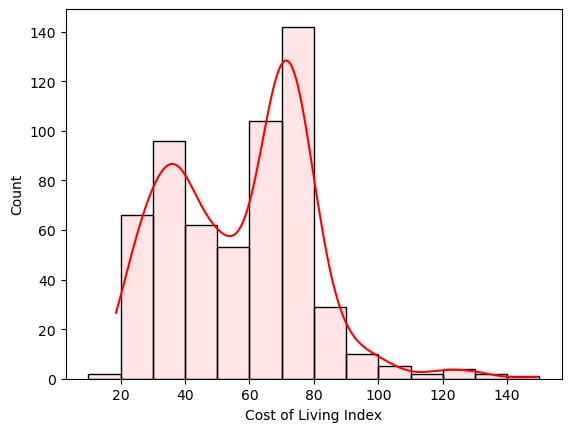

In [136]:
col_hist = sns.histplot(clean_col_df['Cost of Living Index'],
                        color = 'red', 
                        alpha = 0.10, 
                        bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150],
                        kde = True)
plt.show()

- NYC is towards the top of our cost of living index, so the majority of cities in our dataset are less expensive to live in than NYC

In [86]:
coli_df = []

coli_df = clean_col_df[['City', 'Cost of Living Index']].copy()

coli_df = coli_df.sort_values(['Cost of Living Index'], ascending=[True])

coli_top5_df = coli_df.copy().head()

coli_top5_df

,City,Cost of Living Index
577,"Peshawar, Pakistan",18.55
576,"Multan, Pakistan",18.68
575,"Rawalpindi, Pakistan",20.52
574,"Karachi, Pakistan",20.75
573,"Kanpur, India",20.79


- According to our cost of living index, Peshawar, Pakistan is the location to live with the best cost of living.

- Below, I use the median data scientist salary we found earlier to determine how much of our salary is going to be required to maintain our lifestyle minus rent if we live in any of these five locations.

In [87]:
coli_top5_df['Equivalent Salary (USD)'] = (coli_top5_df['Cost of Living Index'].astype(int)/100)*(170000-51000)

coli_top5_df

,City,Cost of Living Index,Equivalent Salary (USD)
577,"Peshawar, Pakistan",18.55,21420.0
576,"Multan, Pakistan",18.68,21420.0
575,"Rawalpindi, Pakistan",20.52,23800.0
574,"Karachi, Pakistan",20.75,23800.0
573,"Kanpur, India",20.79,23800.0


In [83]:
# c.convert('USD', 'PKR', 21420.00)

- Pakistani Rupees are not available for conversion in the current forex documentation so we will keep the reported number in USD
- Four of the five cities with the lowest Cost of Living Index are in Pakistan, and if we choose to live in Peshawar, we can expect to maintain our lifestyle using only \\$21,420.00 (USD)

## 2. Rent Index

Second, I will pull the five cities with the lowest rent index following the same method as above.

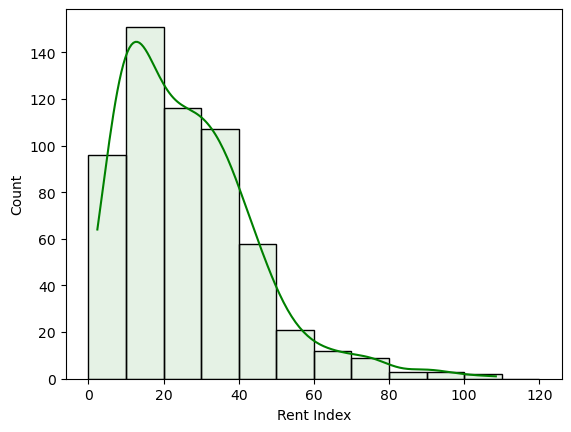

In [134]:
rent_hist = sns.histplot(clean_col_df['Rent Index'], 
                         color = 'green',                         
                         alpha = 0.10, 
                         bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120],
                         kde = True)
plt.show()

- NYC is even closer to the top of the Rent Index, which makes sense since we found that the max rent index was only 108.42.

In [85]:
renti_df = []

renti_df = clean_col_df[['City', 'Rent Index']].copy()

renti_df = renti_df.sort_values(['Rent Index'], ascending=[True])

renti_top5_df = renti_df.copy().head()

renti_top5_df

,City,Rent Index
577,"Peshawar, Pakistan",2.37
566,"Jammu, India",2.94
576,"Multan, Pakistan",2.94
565,"Agra, India",2.97
571,"Kabul, Afghanistan",3.17


- Using our average rent of 30% of our data science median income, I used \\$51,000 to calculate how much we can expect to spend on rent to maintain our lifestyle

In [15]:
renti_top5_df['Equivalent Budget (USD)'] = (renti_top5_df['Rent Index'].astype(int)/100)*(51000)

renti_top5_df

,City,Rent Index,Equivalent Budget (USD)
577,"Peshawar, Pakistan",2.37,1020.0
566,"Jammu, India",2.94,1020.0
576,"Multan, Pakistan",2.94,1020.0
565,"Agra, India",2.97,1020.0
571,"Kabul, Afghanistan",3.17,1530.0


- Peshawar once again was at the bottom of the index, this time for rent, and if we choose to move to Peshawar, we can expect our annual rent to go down to \\$1020.00 (USD)

## 3. Cost of Living Plus Rent Index

Third, I will analyze the Cost of Living Plus Rent Index. In my opinion this is the single most comprehensive index of all of them since it takes into account Cost of Living (which encompasses groceries and restaurant prices) and Rent.

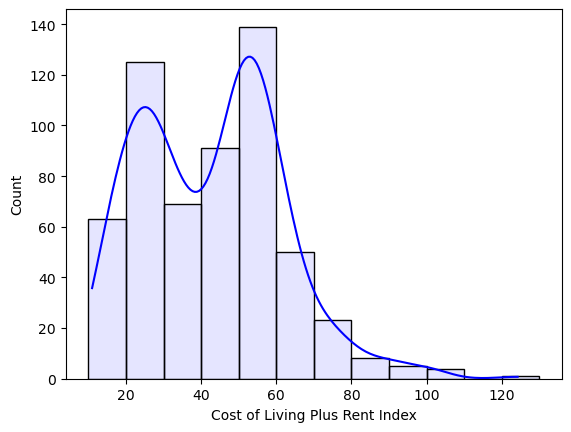

In [132]:
clr_hist = sns.histplot(clean_col_df['Cost of Living Plus Rent Index'], 
                        color = 'blue',                  
                        alpha = 0.10, 
                        bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130],
                        kde = True)
plt.show()

- NYC is once again at the top of this index, so we can expect to save money if we move to a lot of places and keep our salary, but let's see where we can save the most money.

In [84]:
colpri_df = []

colpri_df = clean_col_df[['City', 'Cost of Living Plus Rent Index']].copy()

colpri_df = colpri_df.sort_values(['Cost of Living Plus Rent Index'], ascending=[True])

colpri_top5_df = colpri_df.copy().head()

colpri_top5_df

,City,Cost of Living Plus Rent Index
577,"Peshawar, Pakistan",10.97
576,"Multan, Pakistan",11.30
573,"Kanpur, India",12.73
571,"Kabul, Afghanistan",12.83
566,"Jammu, India",13.08


- Once again, Peshawar, Pakistan is the cheapest location by another index. 

- Using the median income from NYC once again, we will find the equivalent salary we would need to maintain our lifestyle.

In [18]:
colpri_top5_df['Equivalent Salary (USD)'] = (colpri_top5_df['Cost of Living Plus Rent Index'].astype(int)/100)*170000

colpri_top5_df

,City,Cost of Living Plus Rent Index,Equivalent Salary (USD)
577,"Peshawar, Pakistan",10.97,17000.0
576,"Multan, Pakistan",11.30,18700.0
573,"Kanpur, India",12.73,20400.0
571,"Kabul, Afghanistan",12.83,20400.0
566,"Jammu, India",13.08,22100.0


Living in Peshawar is looking like it is going to be one of our best options for saving money and living cheaper. We will only need to use \\$17,000 of our salary to maintain our lifestyle in Peshawar, so we would have \\$153,000 (USD) to use how we would like after we've met our basic needs

## 4. Groceries Index

Fourth, I will analyze the Groceries Index and determine where we can live and spend the least on groceries.

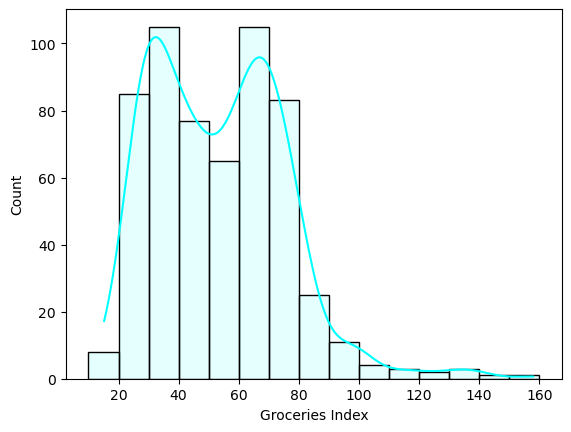

In [140]:
groci_hist = sns.histplot(clean_col_df['Groceries Index'], 
                          color = 'cyan',                  
                          alpha = 0.10, 
                          bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160],
                          kde = True)
plt.show()

- There are a few locations that are much more expensive than NYC for groceries but once again the vast majority of locations will be cheaper.

In [88]:
groci_df = []

groci_df = clean_col_df[['City', 'Groceries Index']].copy()

groci_df = groci_df.sort_values(['Groceries Index'], ascending=[True])

groci_top5_df = groci_df.copy().head()

groci_top5_df

,City,Groceries Index
571,"Kabul, Afghanistan",15.22
577,"Peshawar, Pakistan",16.62
559,"Bucaramanga, Colombia",18.09
576,"Multan, Pakistan",18.37
570,"Islamabad, Pakistan",18.39


- This is the first index that Peshawar isn't the lowest on. This time, Kabul, Afghanistan is the cheapest location for groceries. Peshawar comes in second though and still looks good as the best candidate to move to to save money.

In [89]:
groci_top5_df['Equivalent Budget (USD)'] = (groci_top5_df['Groceries Index'].astype(int)/100)*11288

groci_top5_df

,City,Groceries Index,Equivalent Budget (USD)
571,"Kabul, Afghanistan",15.22,1693.20
577,"Peshawar, Pakistan",16.62,1806.08
559,"Bucaramanga, Colombia",18.09,2031.84
576,"Multan, Pakistan",18.37,2031.84
570,"Islamabad, Pakistan",18.39,2031.84


- In Kabul, we can expect our annual grocery budget to be \\$1693.20 (USD). Once again, forex doesn't have Afghanistan Afghanis loaded so we will keep using (USD).

## 5. Restaurant Price Index

Fifth, I will analyze the Restaurant Price Index and determine where we can live and spend the least on eating out.

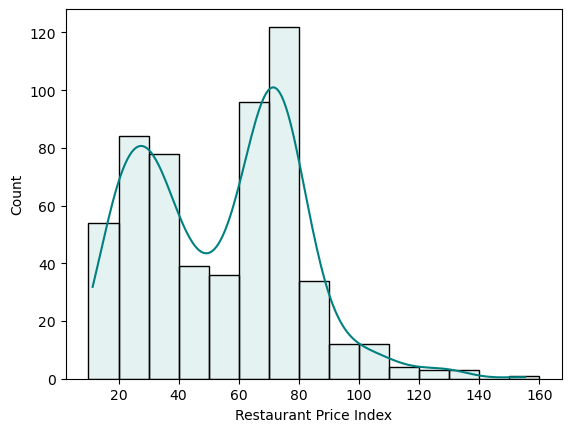

In [143]:
rest_hist = sns.histplot(clean_col_df['Restaurant Price Index'], 
                         color = 'teal',                   
                         alpha = 0.10, 
                         bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160],
                         kde = True)
plt.show()

- NYC is once again one of the most expensive locations to eat out

In [90]:
resti_df = []

resti_df = clean_col_df[['City', 'Restaurant Price Index']].copy()

resti_df = resti_df.sort_values(['Restaurant Price Index'], ascending=[True])

resti_top5_df = resti_df.copy().head()

resti_top5_df

,City,Restaurant Price Index
572,"Thrissur, India",11.39
576,"Multan, Pakistan",11.80
568,"Kozhikode (Calicut), India",12.07
542,"Madurai, India",12.30
573,"Kanpur, India",13.31


- This is the first time that Peshawar isn't even on the top five. Instead, the top city for saving money while eating out is Thrissur, India.

In [23]:
resti_top5_df['Equivalent Budget (USD)'] = (resti_top5_df['Restaurant Price Index'].astype(int)/100)*5712

resti_top5_df

,City,Restaurant Price Index,Equivalent Budget (USD)
572,"Thrissur, India",11.39,628.32
576,"Multan, Pakistan",11.80,628.32
568,"Kozhikode (Calicut), India",12.07,685.44
542,"Madurai, India",12.30,685.44
573,"Kanpur, India",13.31,742.56


In [93]:
print(round(c.convert('USD','INR', 170000),2))

print(round(c.convert('USD','INR', 628.32),2))

13918584.52
51443.09


- If our company chooses to pay us in Indian Rupees while we lived in Thrissur our annual salary would be ₹13,918,584.52

- In Thrissur, we can budget annually 51,443.09 (INR) or \\$628.32 (USD) for dining out

## 6. Local Purchasing Power Index

Finally, I took a look at Local Purchasing Power Index. This is different from all the other indexes because unlike the others, a lower value means that it is more expensive for goods and services relative to NYC

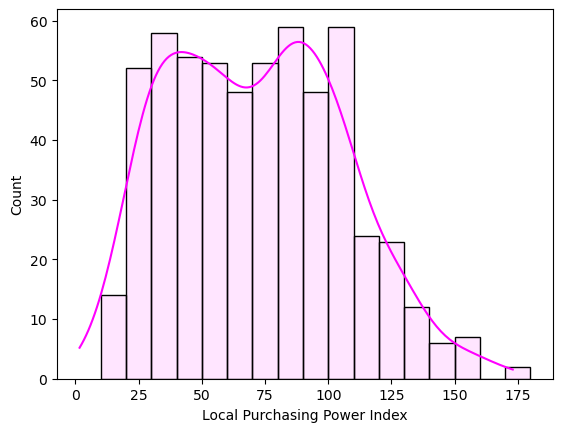

In [145]:
lppi_hist = sns.histplot(clean_col_df['Local Purchasing Power Index'],
                         color = 'magenta',
                         alpha = 0.10, 
                         bins = [0, 25, 50, 75, 100, 125, 150, 175],
                         kde = True)
plt.show()

- This index is also the only one where NYC is at the top of the values.
- This index is looking at how much a person can purchase on an average salary, and so we might expect some differences from our earlier indexes

- Since higher is better for this index, we will order the values descending this time.

In [94]:
lppi_df = []

lppi_df = clean_col_df[['City', 'Local Purchasing Power Index']].copy()

lppi_df = lppi_df.sort_values(['Local Purchasing Power Index'], ascending=[False])

lppi_top5_df = lppi_df.copy().head()
lppi_top5_df

,City,Local Purchasing Power Index
276,"Houston, TX, United States",172.98
233,"Dallas, TX, United States",170.66
190,"Ann Arbor, MI, United States",159.99
250,"Austin, TX, United States",158.21
130,"San Jose, CA, United States",157.39


- For this index, our best city is Houston. In Houston a person can afford to buy on average 72.98% more than a person in NYC given the average net salary in NYC. This means that for goods and services our dollar will go further in Houston than any other city.

- Given how much we are saving by moving to Peshawar in all the other aspects of life, let's see how much more we can expect to spend on goods and services and make sure the move is still worth it

In [103]:
pesh_col = clean_col_df.loc[(col_df['City'].str.contains("peshawar", case = False))].copy()

pesh_col

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
577,"Peshawar, Pakistan",18.55,2.37,10.97,16.62,14.39,26.0


- Our local purchasing power index in Peshawar Pakistan is 26.0. So while we are saving a lot of money and necessities, goods and services will cost us on average 74% more living in Peshawar

## Results:

If our main goal is saving as much of our salary as possible, living in Peshawar remains our best option. We will be able to maintain our lifestyle for a low cost and be able to either save or spend on luxury goods a majority of our salary.

I don't think I'm quite ready to leave the US though, so I wanted to analyze the best locations in the US to live in to make the most of my salary.

## US Locations

I am now going to analzye each of the indexes across US locations:

    1. Cost of Living
    2. Rent
    3. Cost of Living plus Rent
    4. Groceries
    5. Restaurant Price
    6. Local Purchasing Power
   

I created a new data frame containing only cities from the US

In [104]:
us_col_df = []

us_col_df = clean_col_df.loc[(col_df['City'].str.contains("United States", case = False))].copy()

us_col_df

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
10,"Honolulu, HI, United States",103.65,65.07,85.56,114.92,94.28,89.24
13,"New York, NY, United States",100.00,100.00,100.00,100.00,100.00,100.00
18,"Santa Barbara, CA, United States",95.01,78.42,87.23,99.53,99.41,93.86
20,"Berkeley, CA, United States",94.36,88.22,91.48,106.23,78.85,85.78
21,"San Francisco, CA, United States",93.91,108.42,100.72,97.05,93.40,133.16
...,...,...,...,...,...,...,...
291,"Memphis, TN, United States",62.29,34.91,49.45,58.08,69.54,109.95
293,"Akron, OH, United States",62.20,22.90,43.78,63.55,55.56,102.89
299,"Little Rock, AR, United States",59.26,25.60,43.48,57.28,64.63,131.07
304,"Wichita, KS, United States",58.92,24.26,42.67,53.08,57.42,119.24


## 1. Cost of Living (Excluding Rent)

- I then ran the same analysis of Cost of Living (Excluding Rent)

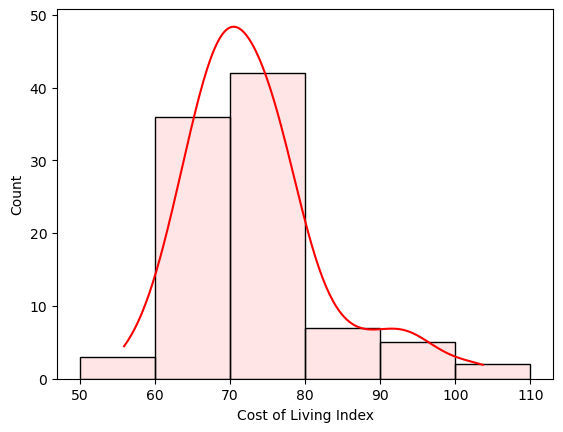

In [138]:
us_col_hist = sns.histplot(us_col_df['Cost of Living Index'], 
                           color = 'red',
                           alpha = 0.10, 
                           bins = [50, 60, 70, 80, 90, 100, 110],
                           kde = True)
plt.show()

- We can see that even compared to just US cities, New York is towards the top of the cost of living index. By moving to a different city we should be able to save money.

In [108]:
us_coli_df = []

us_coli_df = us_col_df[['City', 'Cost of Living Index']].copy()

us_coli_df = us_coli_df.sort_values(['Cost of Living Index'], ascending=[True])

us_coli_top5 = us_coli_df.copy().head()

us_coli_top5

,City,Cost of Living Index
314,"El Paso, TX, United States",55.92
304,"Wichita, KS, United States",58.92
299,"Little Rock, AR, United States",59.26
293,"Akron, OH, United States",62.20
291,"Memphis, TN, United States",62.29


- The lowest cost of living index for our US cities in the dataset is El Paso, Texas.

In [30]:
us_coli_top5['Equivalent Salary Required Minus Rent(USD)'] = (us_coli_top5['Cost of Living Index'].astype(int)/100)*(170000-51000)

us_coli_top5

,City,Cost of Living Index,Equivalent Salary Require Minus Rent(USD)
314,"El Paso, TX, United States",55.92,65450.0
304,"Wichita, KS, United States",58.92,69020.0
299,"Little Rock, AR, United States",59.26,70210.0
293,"Akron, OH, United States",62.20,73780.0
291,"Memphis, TN, United States",62.29,73780.0


- In El Paso, to maintain our standard of living minus rent, we only need to make \\$65,450

## 2. Rent

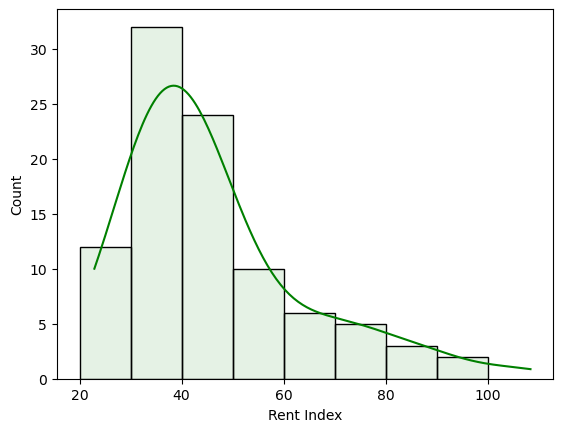

In [123]:
us_rent_hist = sns.histplot(us_col_df['Rent Index'], color = 'green',                   
                  alpha = 0.10, 
                  bins = [20, 30, 40, 50, 60, 70, 80, 90, 100],
                  kde = True)
plt.show()

- NYC is also among the most expensive rents in the United States

In [106]:
us_renti_df = []

us_renti_df = us_col_df[['City', 'Rent Index']].copy()

us_renti_df = us_renti_df.sort_values(['Rent Index'], ascending=[True])

us_renti_top5 = us_renti_df.copy().head()

us_renti_top5

,City,Rent Index
293,"Akron, OH, United States",22.90
265,"Toledo, OH, United States",22.91
314,"El Paso, TX, United States",23.17
304,"Wichita, KS, United States",24.26
299,"Little Rock, AR, United States",25.60


- The lowest rent index for the cities in our dataset is Akron, Ohio. El Paso is third lowest, so we will see if it stays the best option with Cost of Living Plus Rent.

In [33]:
us_renti_top5['Equivalent Rent Budget (USD)'] = (us_renti_top5['Rent Index'].astype(int)/100)*51000

us_renti_top5

,City,Rent Index,Equivalent Rent Budget (USD)
293,"Akron, OH, United States",22.90,11220.0
265,"Toledo, OH, United States",22.91,11220.0
314,"El Paso, TX, United States",23.17,11730.0
304,"Wichita, KS, United States",24.26,12240.0
299,"Little Rock, AR, United States",25.60,12750.0


- In Akron, we can expect to spend \\$11220.00 on rent to maintain our standard

## 3. Cost of Living plus Rent

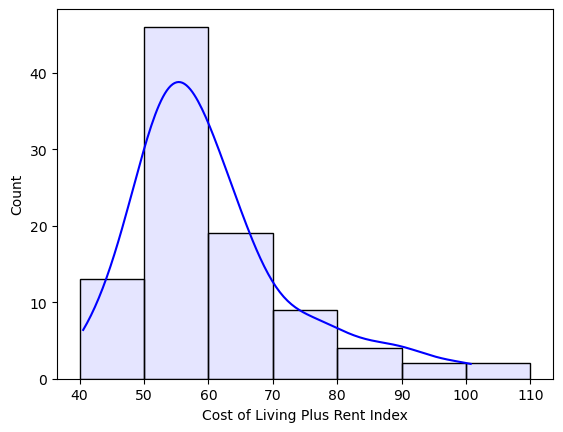

In [121]:
us_clr_hist = sns.histplot(us_col_df['Cost of Living Plus Rent Index'],
                           color = 'blue',
                           alpha = 0.10, 
                           bins = [40, 50, 60, 70, 80, 90, 100, 110],
                           kde = True)
plt.show()

- NYC is high in cost of living plus rent, so moving to a lot of different locations will be helpful for saving money.

In [109]:
us_colpri_df = []

us_colpri_df = us_col_df[['City', 'Cost of Living Plus Rent Index']].copy()

us_colpri_df = us_colpri_df.sort_values(['Cost of Living Plus Rent Index'], ascending=[True])

us_colpri_top5 = us_colpri_df.copy().head()

us_colpri_top5

,City,Cost of Living Plus Rent Index
314,"El Paso, TX, United States",40.56
304,"Wichita, KS, United States",42.67
299,"Little Rock, AR, United States",43.48
293,"Akron, OH, United States",43.78
265,"Toledo, OH, United States",45.26


- El Paso, Texas is the best city to move to according to our Cost of Living plus Rent index

In [36]:
us_colpri_top5['Equivalent Salary Required(USD)'] = (us_colpri_top5['Cost of Living Plus Rent Index'].astype(int)/100)*170000

us_colpri_top5

,City,Cost of Living Plus Rent Index,Equivalent Salary Required(USD)
314,"El Paso, TX, United States",40.56,68000.0
304,"Wichita, KS, United States",42.67,71400.0
299,"Little Rock, AR, United States",43.48,73100.0
293,"Akron, OH, United States",43.78,73100.0
265,"Toledo, OH, United States",45.26,76500.0


- The salary required to maintain our lifestyle in El Paso is only \\$68,000!

## 4. Groceries

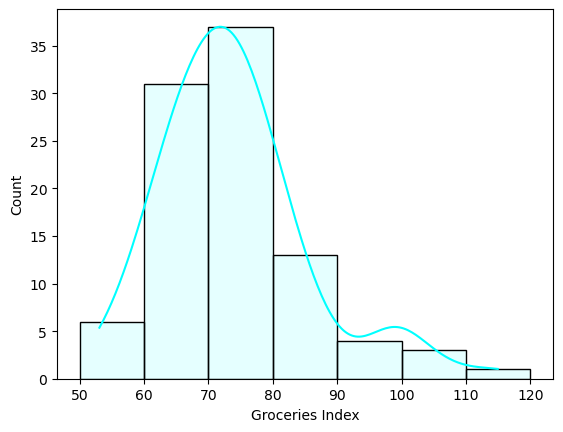

In [118]:
us_groci_hist = sns.histplot(us_col_df['Groceries Index'],
                             color = 'cyan', 
                             alpha = 0.10, 
                             bins = [50, 60, 70, 80, 90, 100, 110, 120],
                             kde = True)
plt.show()

- Groceries cost more in NYC than they do in most of the US

In [38]:
us_groci_df = []

us_groci_df = us_col_df[['City', 'Groceries Index']].copy()

us_groci_df = us_groci_df.sort_values(['Groceries Index'], ascending=[True])

us_groci_top5 = us_groci_df.head().copy()

us_groci_top5

,City,Groceries Index
304,"Wichita, KS, United States",53.08
314,"El Paso, TX, United States",54.45
286,"San Antonio, TX, United States",57.25
299,"Little Rock, AR, United States",57.28
291,"Memphis, TN, United States",58.08


- Wichita, Kansas is the cheapest US city for groceries in our dataset, but El Paso is second cheapest.

In [39]:
us_groci_top5['Equivalent Grocery Budget (USD)'] = (us_groci_top5['Groceries Index'].astype(int)/100)*11288

us_groci_top5

,City,Groceries Index,Equivalent Grocery Budget (USD)
304,"Wichita, KS, United States",53.08,5982.64
314,"El Paso, TX, United States",54.45,6095.52
286,"San Antonio, TX, United States",57.25,6434.16
299,"Little Rock, AR, United States",57.28,6434.16
291,"Memphis, TN, United States",58.08,6547.04


- Our annual grocery budget in Wichita would only be \\$5982.64 and in El Paso it would only be \\$6095.52

## 5. Restaurant Price

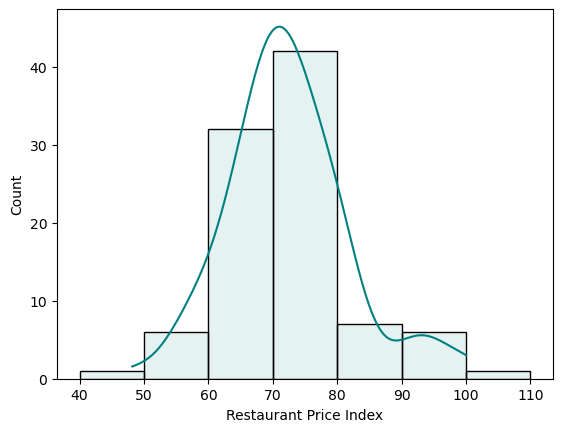

In [149]:
us_resti_hist = sns.histplot(us_col_df['Restaurant Price Index'], 
                             color = 'teal',
                             alpha = 0.10, 
                             bins = [40, 50, 60, 70, 80, 90, 100, 110],
                             kde = True)
plt.show()

- NYC is one of the most expensive cities in the US for dining out.

In [41]:
us_resti_df = []

us_resti_df = us_col_df[['City', 'Restaurant Price Index']].copy()

us_resti_df = us_resti_df.sort_values(['Restaurant Price Index'], ascending=[True])

us_resti_top5 = us_resti_df.head().copy()

us_resti_top5

,City,Restaurant Price Index
314,"El Paso, TX, United States",48.18
293,"Akron, OH, United States",55.56
283,"Lexington, KY, United States",55.65
150,"Fort Collins, CO, United States",56.71
304,"Wichita, KS, United States",57.42


- El Paso, Texas is the cheapest US city in our dataset for dining out.

In [42]:
us_resti_top5['Equivalent Restaurant Budget (USD)'] = (us_resti_top5['Restaurant Price Index'].astype(int)/100)*5712

us_resti_top5

,City,Restaurant Price Index,Equivalent Restaurant Budget (USD)
314,"El Paso, TX, United States",48.18,2741.76
293,"Akron, OH, United States",55.56,3141.60
283,"Lexington, KY, United States",55.65,3141.60
150,"Fort Collins, CO, United States",56.71,3198.72
304,"Wichita, KS, United States",57.42,3255.84


- In El Paso our equivalent dining out budget is only \\$2741.76, so we will save a good amount when eating out.

## 6. Local Purchasing Power

- Again, with Local Purchasing Power, the higher the number, the better.

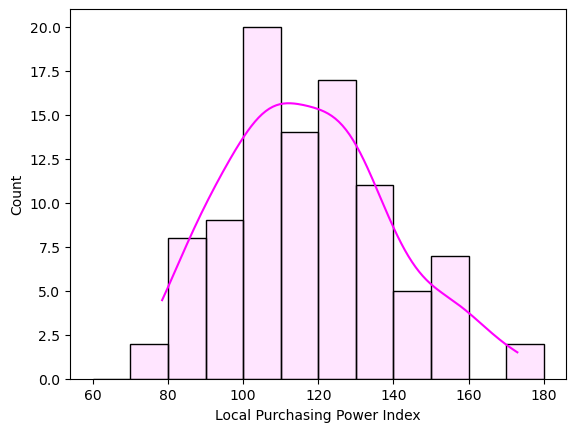

In [151]:
us_lppi_hist = sns.histplot(us_col_df['Local Purchasing Power Index'], 
                            color = 'magenta', 
                            alpha = 0.10, 
                            bins = [60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160 ,170, 180],
                            kde = True)
plt.show()

- Our money appears to go further in a majority of the US as opposed to NYC.

In [44]:
us_lppi_df = []

us_lppi_df = us_col_df[['City', 'Local Purchasing Power Index']].copy()

us_lppi_df = us_lppi_df.sort_values(['Local Purchasing Power Index'], ascending=[False])

us_lppi_top5 = us_lppi_df.head().copy()

us_lppi_top5

,City,Local Purchasing Power Index
276,"Houston, TX, United States",172.98
233,"Dallas, TX, United States",170.66
190,"Ann Arbor, MI, United States",159.99
250,"Austin, TX, United States",158.21
130,"San Jose, CA, United States",157.39


- Houston remain the best city for Local Purchasing Power, but let's see how El Paso looks since that looks to be the city we can move to in th US to save the most amount of money.

In [152]:
elpaso_col = us_col_df.loc[(col_df['City'].str.contains("el paso", case = False))].copy()

elpaso_col

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
314,"El Paso, TX, United States",55.92,23.17,40.56,54.45,48.18,118.77


- Our Local Purchasing Power in El Paso is 118.77, so while we might be spending more on goods and services than we would in Houston, we are still spending less than we would in NYC.

## Results

Given how much money we are saving on esssentials by looking at the first five indexes, and that our local purchasing power is still strong; El Paso, Texas is where we should move in the US to maintain our standard of living and save the most money.